<img src = excelrlogo.png/>

### ASSIGNMENT-11 -- TEXT MINING

#### PROBLEM STATEMENTS --- Elon_musk

#### For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

 TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

#### NEGATIVE WORD

#### POSITIVE WORD

#### STOP WORD

#### Libraries

In [19]:
import numpy as np
import pandas as pd

In [20]:
Elon_musk = pd.read_csv('Elon_musk.csv',encoding='Latin-1')
Elon_musk

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


#### Read/Load the Dataset

In [21]:
Elon_musk.drop(['Unnamed: 0'], inplace= True, axis= 1)
Elon_musk

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


#### Data Exploration

In [24]:
import matplotlib.pyplot as plt

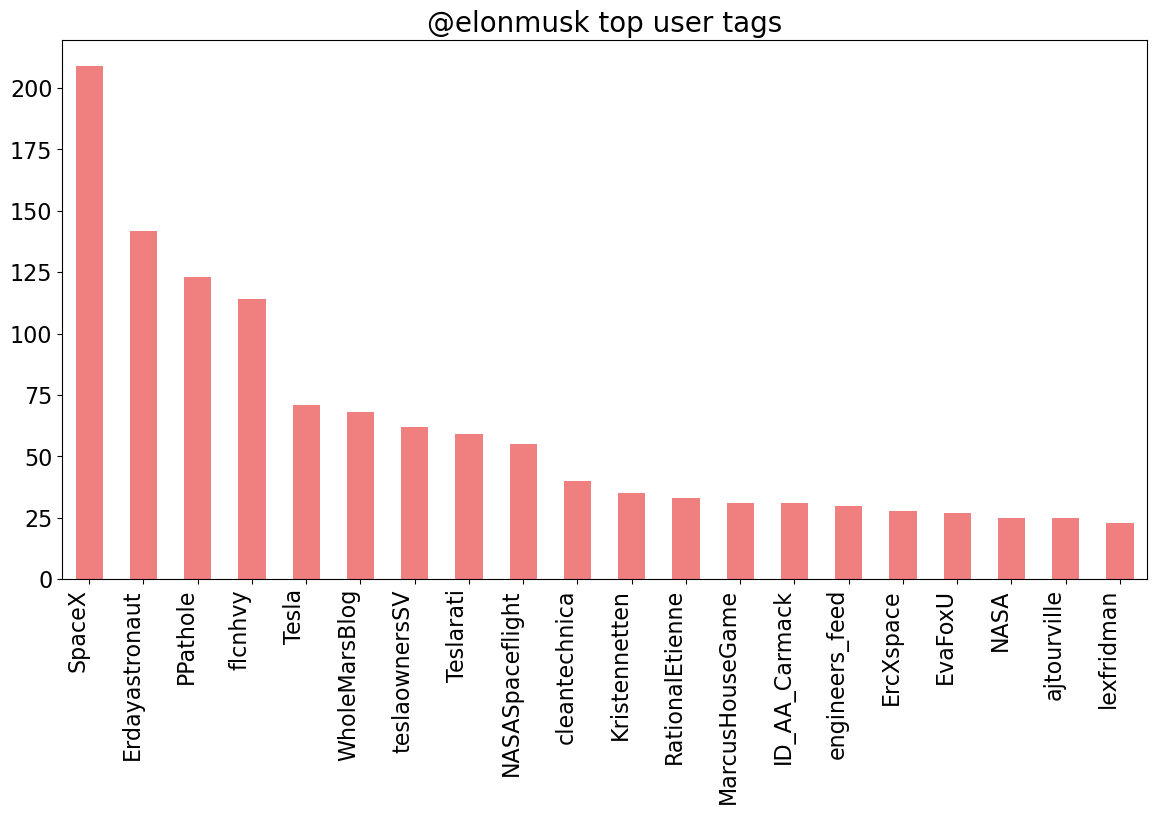

In [25]:
import itertools

c = list(itertools.chain(*Elon_musk.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                                                     if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass

#### Cleaning the text by removing irrelevant information

In [27]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

Elon_musk["Text"] = Elon_musk["Text"].apply(clean_text) 
Elon_musk

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1994,flcnhvy true it sounds so surreal but the nega...
1995,ppathole make sure to read ur terms amp condit...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is


#### Word Frequency

In [28]:
freq = pd.Series(' '.join(Elon_musk['Text']).split()).value_counts()[:20] 
freq

the               486
to                400
a                 355
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
dtype: int64

#### Removing Stopwords

In [29]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
Elon_musk['Text'] = Elon_musk['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#### Word Frequency after Removal of Stopwords

In [30]:
freq_stp = pd.Series(' '.join(Elon_musk['Text']).split()).value_counts()[:20] 
freq_stp

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
its                56
haha                55
nasaspaceflight     55
good                51
launch              49
sure                43
yeah                41
would               40
dtype: int64

#### Count vectoriser tells the frequency of a word.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
vectorizer = CountVectorizer(min_df=1, max_df=0.9)

X = vectorizer.fit_transform(Elon_musk["Text"])

feature_names = vectorizer.get_feature_names_out()

word_frequencies = np.asarray(X.sum(axis=0)).ravel().tolist()

word_freq_df = pd.DataFrame({'term': feature_names, 'occurrences': word_frequencies})

word_freq_df['frequency'] = word_freq_df['occurrences'] / np.sum(word_freq_df['occurrences'])

print(word_freq_df)

                 term  occurrences  frequency
0                aber            1   0.000075
1                able            6   0.000449
2                 abo            1   0.000075
3              aboard            1   0.000075
4               abort            3   0.000224
...               ...          ...        ...
4456  zshauladventure            1   0.000075
4457       zubinanary            1   0.000075
4458      zwiebelbach            1   0.000075
4459           zzcool            1   0.000075
4460         ðogecoin            1   0.000075

[4461 rows x 3 columns]


#### TFIDF - Term frequency inverse Document Frequencyt

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.5, smooth_idf=True) 
doc_vec = vectorizer.fit_transform(Elon_musk["Text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=names_features)
print(df)

      able  abort  absolutely  access  accurate  actual  actually  adamklotz  \
0      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
2      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
3      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
4      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
...    ...    ...         ...     ...       ...     ...       ...        ...   
1994   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1995   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1996   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1997   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1998   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   

      add  adding  ...  yahoofinance  y

#### Bi-gram

In [42]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [43]:
top2_words = get_top_n2_words(Elon_musk["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df

,Bi-gram,Freq
0,rt spacex,71
1,we re,26
2,spacex falcon,17
3,erdayastronaut spacex,16
4,crew dragon,13
...,...,...
195,terafactorytx lqdchkn,3
196,klotzadam nasaspaceflight,3
197,kristennetten teslaownerssv,3
198,neural nets,3


#### Bi-gram plot

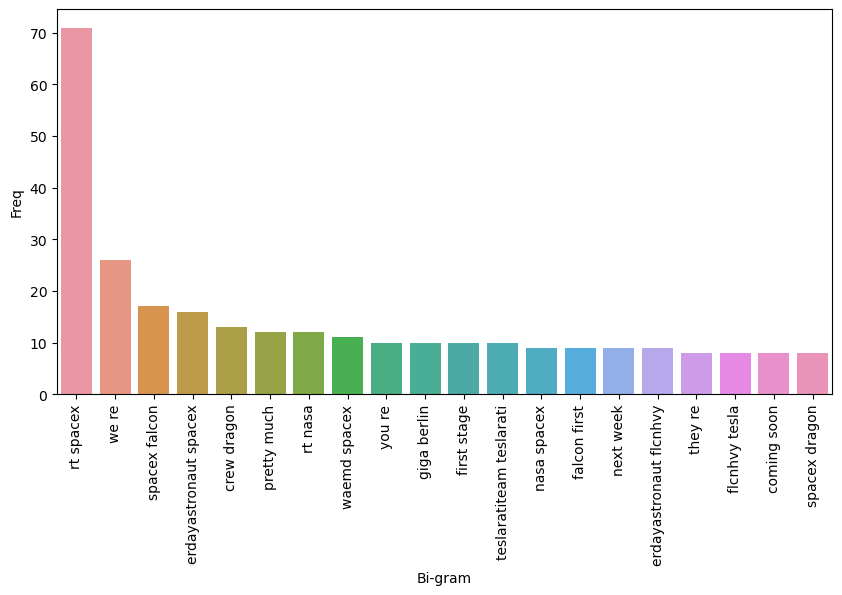

In [44]:
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

#### Tri-gram

In [45]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [46]:
top3_words = get_top_n3_words(Elon_musk["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7
5,ppathole thesheetztweetz waemd,7
6,waemd spacex spacexstarlink,7
7,first stage landed,6
8,rt spacex liftoff,6
9,spacex spacexstarlink wanationalguard,6


#### Tri-gram plot

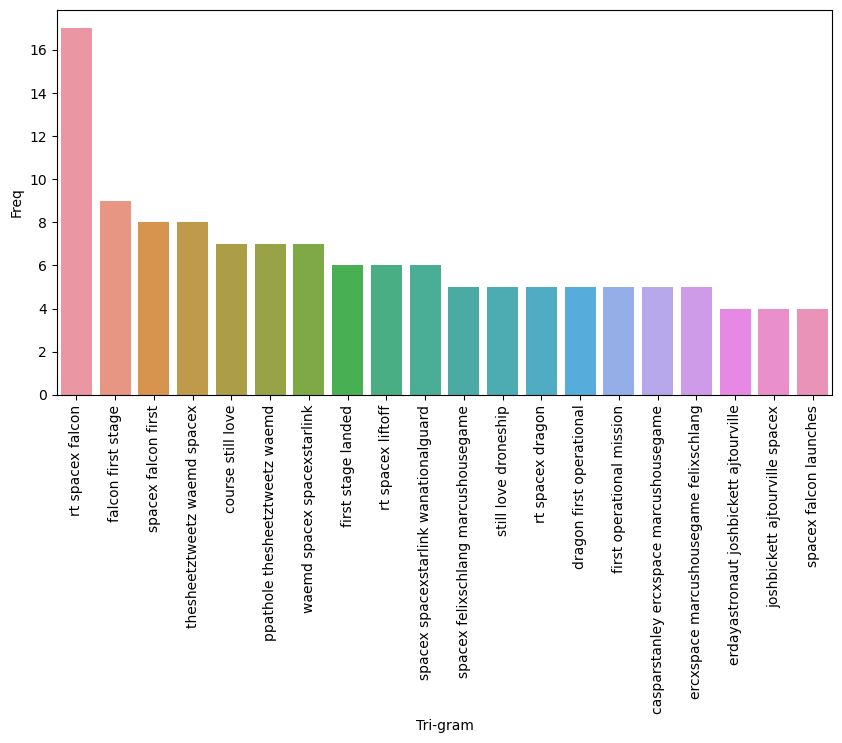

In [47]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

#### Creating a Worlcloud

In [48]:
string_Total = " ".join(Elon_musk["Text"])

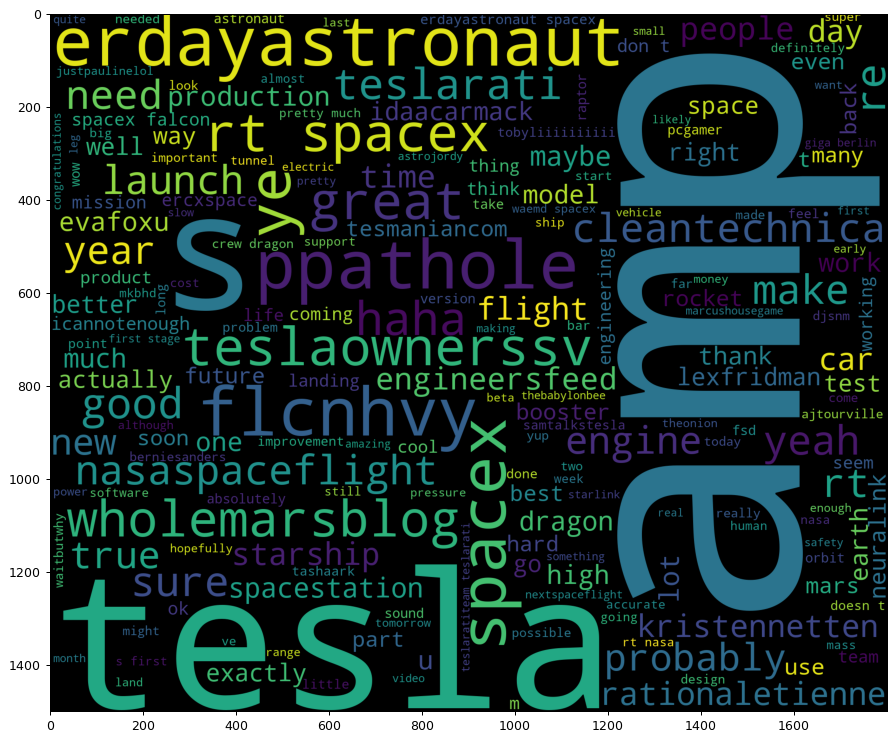

In [49]:
from wordcloud import WordCloud
plt.figure(figsize=(12,12),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

#### Subjectivity and Polarity

In [50]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])
Elon_musk[["subjectivity", "polarity"]] = Elon_musk.apply(sentiment_analysis, axis=1)
Elon_musk

,Text,subjectivity,polarity
0,im alien,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
...,...,...,...
1994,flcnhvy true sounds surreal negative propagand...,0.508333,0.111111
1995,ppathole make sure read ur terms amp condition...,0.888889,0.500000
1996,teslagong ppathole samwise gamgee,0.000000,0.000000
1997,ppathole altho dumb dumber,0.500000,-0.375000


#### Creating a Worlcloud

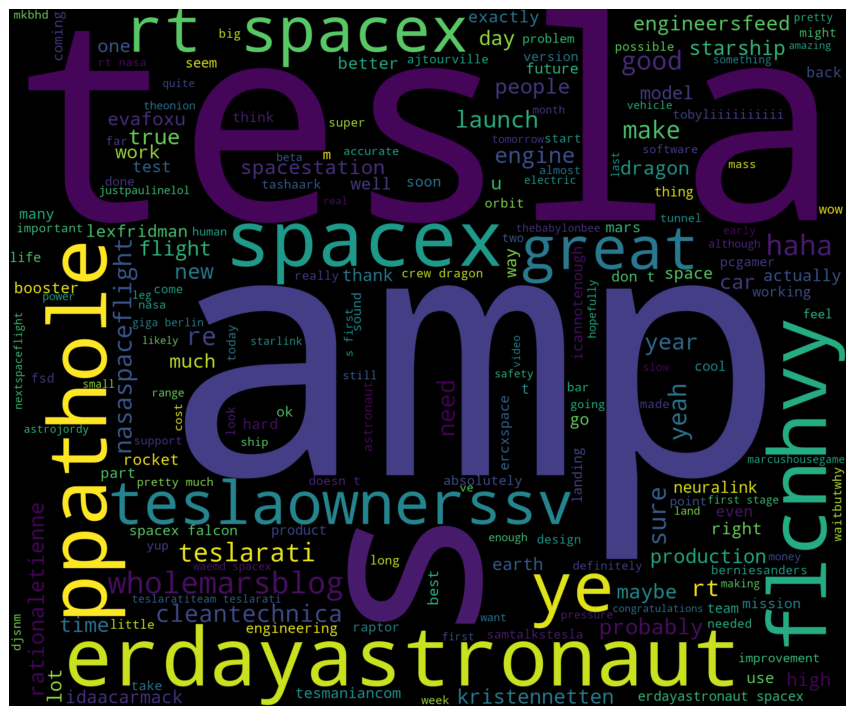

In [52]:
allwords = " ".join([twts for twts in Elon_musk["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [53]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [54]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
Elon_musk["analysis"] = Elon_musk["polarity"].apply(analysis)

In [55]:
positive_Elon_musk = Elon_musk[Elon_musk['analysis'] == 'Positive']
negative_Elon_musk = Elon_musk[Elon_musk['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_Elon_musk[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_Elon_musk[:5].iterrows():
    print(' -' + row['Text'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year


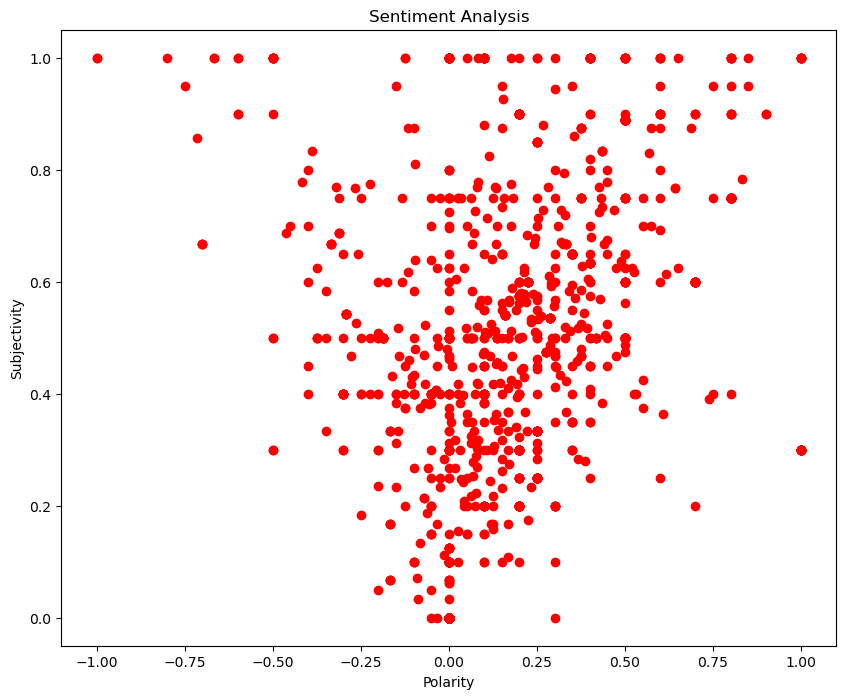

In [57]:
plt.figure(figsize=(10, 8))
for i in range(0, Elon_musk.shape[0]):
    plt.scatter(Elon_musk["polarity"][i], Elon_musk["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") 
plt.xlabel("Polarity") 
plt.ylabel("Subjectivity") 
plt.show()

In [59]:
(len(positive_Elon_musk) / len(negative_Elon_musk))*100

421.608040201005

### Conclusion

Since that number is positive, and quite high of a ratio, we can also conclude that Elon Musk is a positive guy.

### Thank You!